<img src="NotebookAddons/blackboard-banner.png" width="100%" />
<font face="Calibri">
<br>
<font size="7"> <b> GEOS 657: Microwave Remote Sensing<b> </font>

<font size="5"> <b>Lab 4: Exploring SAR Data and SAR Time Series Analysis using Jupyter Notebooks <font color='rgba(200,0,0,0.2)'> -- [20 Points] </font> </b> </font>

<br>
<font size="4"> <b> Franz J Meyer; University of Alaska Fairbanks & Josef Kellndorfer, <a href="http://earthbigdata.com/" target="_blank">Earth Big Data, LLC</a> </b> <br>
<img style="padding:7px;" src="NotebookAddons/UAFLogo_A_647.png" width="170" align="right" /><font color='rgba(200,0,0,0.2)'> <b>Assignment Due Date: </b> March 04, 2021 </font>
</font>

<font size="3"> This Lab is part of the UAF course <a href="https://radar.community.uaf.edu/" target="_blank">GEOS 657: Microwave Remote Sensing</a>. It introduces you to the analysis of deep multi-temporal SAR image data stacks in the framework of *Jupyter Notebooks*. The Jupyter Notebook environment is easy to launch in any web browser for interactive data exploration with provided or new training data. Notebooks are comprised of text written in a combination of executable python code and markdown formatting including latex style mathematical equations. Another advantage of Jupyter Notebooks is that they can easily be expanded, changed, and shared with new data sets or newly available time series steps. Therefore, they provide an excellent basis for collaborative and repeatable data analysis. <br>

<b>In this chapter we introduce the following data analysis concepts:</b>

- How to load time series stacks into Jupyter Notebooks and how to explore image content using basic functions such as mean value calculation and histogram analysis.
- How to apply calibration constants to covert initial digital number (DN) data into calibrated radar cross section information.
- How to subset images create time series information of calibrated SAR amplitude values.
- How to explore the time-series information in SAR data stacks for environmental analysis.
</font>


<div class="alert alert-danger">
<font face="Calibri" size="4"> <font color='rgba(200,0,0,0.2)'> <b>THIS NOTEBOOK INCLUDES A HOMEWORK ASSIGNMENT!</b></font> 
<br>
<font size="3"> Complete all four assignments to achieve full score. </font> <br>
<font size="3"> To submit your homework, please download your Jupyter Notebook from the server both asf PDF (*.pdf) and Notebook file (*.ipynb) and submit them as a ZIP bundle via Blackboard or email (to fjmeyer@alaska.edu). To download, please select the following options in the main menu of the notebook interface:

<ol type="1">
  <li><font color='rgba(200,0,0,0.2)'> <b> Save your notebook with all of its content</b></font> by selecting <i> File / Save and Checkpoint </i> </li>
  <li><font color='rgba(200,0,0,0.2)'> <b>To export in Notebook format</b></font>, click on <i>File / Download as / Notebook (.ipynb)</i>  <font color='gray'>--- Downloading your file may take a bit as the Notebook will be about 100MB in size</font></li>
  <li><font color='rgba(200,0,0,0.2)'> <b>To export in PDF format</b></font>, right-click on your browser window and print the browser content to PDF</li>
</ol>

Contact me at fjmeyer@alaska.edu should you run into any problems.
</font>
</font>
</div>

<div class="alert alert-warning">
<font face="Calibri" size="5" color="darkred"> <b>Important Note about JupyterHub</b> </font>
<br><br>
<font face="Calibri" size="3"> Your JupyterHub server will automatically shutdown when left idle for more than 1 hour. Your notebooks will not be lost but you will have to restart their kernels and re-run them from the beginning. You will not be able to seamlessly continue running a partially run notebook. </font>
</div>

<hr>

# 0. Importing Relevant Python Packages

<font face="Calibri">

<font size="3">In this notebook we will use the following scientific libraries:
<ol type="1">
    <li> <b><a href="https://pandas.pydata.org/" target="_blank">Pandas</a></b> is a Python library that provides high-level data structures and a vast variety of tools for analysis. The great feature of this package is the ability to translate rather complex operations with data into one or two commands. Pandas contains many built-in methods for filtering and combining data, as well as the time-series functionality. </li>
    <li> <b><a href="https://www.gdal.org/" target="_blank">GDAL</a></b> is a software library for reading and writing raster and vector geospatial data formats. It includes a collection of programs tailored for geospatial data processing. Most modern GIS systems (such as ArcGIS or QGIS) use GDAL in the background.</li>
    <li> <b><a href="http://www.numpy.org/" target="_blank">NumPy</a></b> is one of the principal packages for scientific applications of Python. It is intended for processing large multidimensional arrays and matrices, and an extensive collection of high-level mathematical functions and implemented methods makes it possible to perform various operations with these objects. </li>
    <li> <b><a href="https://matplotlib.org/index.html" target="_blank">Matplotlib</a></b> is a low-level library for creating two-dimensional diagrams and graphs. With its help, you can build diverse charts, from histograms and scatterplots to non-Cartesian coordinates graphs. Moreover, many popular plotting libraries are designed to work in conjunction with matplotlib. </li>
    <li> <b><a href="https://github.com/asfadmin/asf-jupyter-notebooks" target="_blank">asf_notebook</a></b> is a set of python utilities put together by the <a href="https://asf.alaska.edu/" target="_blank">Alaska Satellite Facility (ASF)</a> to make accessing and working with ASF SAR Data a bit easier. Utilities include discovering and fetching of ASF products as well as easy mechanisms to create and navigate the OpenSARLab folder structure. </li>

</font>
<br>
<font face="Calibri" size="3"> Our first step is to <b>import them:</b> </font>

In [35]:
%%capture
import os # for chdir, getcwd, path.basename, path.exists
import csv

import pandas as pd # for DatetimeIndex
import gdal # for GetRasterBand, Open, ReadAsArray
import numpy as np #for log10, mean, percentile, power
import matplotlib.pylab as plb # for add_patch, add_subplot, figure, hist, imshow, set_title, xaxis,_label, text 
import matplotlib.pyplot as plt # for add_subplot, axis, figure, imshow, legend, plot, set_axis_off, set_data,
                                # set_title, set_xlabel, set_ylabel, set_ylim, subplots, title, twinx
import matplotlib.patches as patches  # for Rectangle
import matplotlib.animation as an # for FuncAnimation
from matplotlib import rc 

#from asf_notebook import path_exists
#from asf_notebook import asf_unzip
#from asf_notebook import new_directory
#from asf_notebook import jupytertheme_matplotlib_format

from IPython.display import HTML

<font face="Calibri" size="3"><b>Set up matplotlib plotting inside the notebook:</b></font>

In [3]:
%%capture
jupytertheme_matplotlib_format()
%matplotlib inline 

NameError: name 'jupytertheme_matplotlib_format' is not defined

<hr>

# 1. Load Data Stack for this Lab

<font face="Calibri">
<font size="3"> <img src="NotebookAddons/Nepalclimate.jpeg" width="500" align="right" /> This Lab will be using a 70-image deep L-band SAR data stack over Nepal for a first experience with time series processing. The L-band data were acquired by the ALOS PALSAR sensor and are available to us through the services of the <a href="https://www.asf.alaska.edu/" target="_blank">Alaska Satellite Facility</a>. Data are provided as RTC images.

Nepal is an interesting site for this lab due to the significant seasonality of precipitation that is characteristic for this region. Nepal is said to have five seasons: spring, summer, monsoon, autumn and winter. Precipitation is low in the winter (November - March) and peaks dramatically in the summer, with top rain rates in July, August, and September (see figure to the right). As SAR is sensitive to changes in soil moisture, these weather patterns have a noticeable impact on the Radar Cross Section ($\sigma$) time series information. 

We will analyze the variation of $\sigma$ values over time and will interpret them in the context of rainfall rates in the imaged area. 

In this case, we will <b>retrieve the relevant data</b> from an <a href="https://aws.amazon.com/" target="_blank">Amazon Web Service (AWS)</a> cloud storage bucket <b>using the following command</b>:</font> 

</font>

<font face="Calibri" size="3">Before we get started, let's first <b>create a working directory for this analysis and change into it:</b> </font>

In [39]:
path = "/Users/jacktarricone/franz_notebooks/"
os.chdir(path)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /Users/jacktarricone/franz_notebooks


<font face="Calibri" size="3"> The following lines set path variables needed for data processing. This step is not necessary but it saves a lot of extra typing later.<b> Define variables for the main data directory as well as for the files containing data and image information:</b></font>

In [40]:
stack_path = '/Volumes/JT/projects/uavsar/jemez/sen1/jemez_sen1_VV_stack.tif'
datefile = '/Users/jacktarricone/Desktop/sen1_data/sen1_dates.csv'
print(datefile)
#imagefile = 'S32644X696260Y3052060sS1_D_vv_0092_mtfil.vrt'
#imagefile_cross = 'S32644X696260Y3052060sS1_D_vh_0092_mtfil.vrt'

/Users/jacktarricone/Desktop/sen1_data/sen1_dates.csv


In [41]:
with open(datefile) as f:
    reader = csv.reader(f)
    for row in reader:
        print(" ".join(row))

1 2019-10-08
2 2019-11-01
3 2019-11-06
4 2019-11-13
5 2019-11-18
6 2019-11-25
7 2019-11-30
8 2019-12-07
9 2019-12-12
10 2019-12-19
11 2019-12-24
12 2019-12-31
13 2020-01-05
14 2020-01-12
15 2020-01-17
16 2020-01-24
17 2020-01-29
18 2020-02-10
19 2020-02-22
20 2020-02-29
21 2020-03-05
22 2020-03-12
23 2020-03-17
24 2020-04-05
25 2020-04-10
26 2020-04-17
27 2020-04-22
28 2020-04-29
29 2020-05-11
30 2020-06-28
31 2020-08-03
32 2020-08-27


# 2. Switch into the Data Directory

<font face="Calibri" size="3"> We now <b>move to the data directory:</b></font>

In [42]:
os.chdir(datadirectory)
print(f"current directory: {os.getcwd()}")

NotADirectoryError: [Errno 20] Not a directory: '/Volumes/JT/projects/uavsar/jemez/sen1/jemez_sen1_VV_stack.tif'

In [8]:
#!ls *.vrt #Uncomment this line to see a List of the files 

# 3. Assess Image Acquisition Dates

<font face="Calibri" size="3"> Before we start analyzing the available image data, we want to examine the content of our data stack. <b>First, we read the image acquisition dates for all files in the time series and create a *pandas* date index.</b> </font>

In [9]:
if path_exists(datefile):
    with open(datefile, 'r') as f:
        dates = f.readlines()
        tindex = pd.DatetimeIndex(dates)

<font face="Calibri" size="3"> From the date index, we <b>make and print a lookup table for band numbers and dates:</b> </font>

In [10]:
if path_exists(imagefile):
    j = 1
    print('Bands and dates for', imagefile)
    for i in tindex:
        print("{:4d} {}".format(j, i.date()),end=' ')
        j += 1
        if j%5 == 1: print()

Bands and dates for S32644X696260Y3052060sS1_D_vv_0092_mtfil.vrt
   1 2014-10-24    2 2014-11-17    3 2014-12-11    4 2015-01-04    5 2015-02-21 
   6 2015-03-05    7 2015-03-29    8 2015-04-22    9 2015-05-04   10 2015-05-16 
  11 2015-05-28   12 2015-06-09   13 2015-07-03   14 2015-07-27   15 2015-08-20 
  16 2015-09-13   17 2015-10-19   18 2015-11-12   19 2016-01-23   20 2016-02-16 
  21 2016-03-11   22 2016-04-04   23 2016-04-28   24 2016-05-22   25 2016-06-15 
  26 2016-08-02   27 2016-08-26   28 2016-09-19   29 2016-10-01   30 2016-10-07 
  31 2016-10-13   32 2016-10-25   33 2016-10-31   34 2016-11-06   35 2016-11-18 
  36 2016-11-24   37 2016-11-30   38 2016-12-12   39 2016-12-18   40 2016-12-24 
  41 2017-01-05   42 2017-01-11   43 2017-01-17   44 2017-01-29   45 2017-02-04 
  46 2017-02-10   47 2017-02-22   48 2017-03-06   49 2017-03-18   50 2017-03-30 
  51 2017-04-11   52 2017-05-05   53 2017-05-17   54 2017-05-29   55 2017-06-10 
  56 2017-06-22   57 2017-07-04   58 2017-07

# 4. Explore the Available Image Data

<font face="Calibri" size="3"> To <b>open an image file using the ```gdal.Open()``` function.</b> This returns a variable (img) that can be used for further interactions with the file: </font>

In [11]:
img = gdal.Open(stack_path)

<font face="Calibri" size="3"> To <b>explore the image (number of bands, pixels, lines),</b> you can use several functions associated with the image object (img) created in the last code cell: </font>

In [12]:
print(img.RasterCount) # Number of Bands
print(img.RasterXSize) # Number of Pixels
print(img.RasterYSize) # Number of Lines

32
833
1666


## 4.1 Reading Data from an Image Band

<font face="Calibri" size="3"> <b>To access any band in the image</b>, use GDAL's ```GetRasterBand(x)``` function. Replace the band_num value with the number of the band you wish to access.</font>

In [13]:
band_num = 15 
band = img.GetRasterBand(band_num)

<font face="Calibri" size="3"> Once a band is seleted, several functions associated with the band are available for further processing, e.g., ```band.ReadAsArray(xoff=0,yoff=0,xsize=None,ysize=None)```

<b>Let's read the entire raster layer for the band:</b> </font>

In [14]:
raster = band.ReadAsArray()

## 4.2 Extracting Subsets from a Larger Image Frame

<font face="Calibri" size="3"> Because of the potentially large data volume when dealing with time series data stacks, it may be prudent to read only a subset of data. 

Using GDAL's ```ReadAsArray()``` function, subsets can be requested by defining pixel offsets and subset size:

**img.ReadAsArray(xoff=0, yoff=0, xsize=None, ysize=None)**

- <i>xoff, yoff</i> are the offsets from the upper left corner in pixel/line coordinates. 
- <i>xsize, ysize</i> specify the size of the subset in x-direction (left to right) and y-direction (top to bottom).

For example, we can <b>read only a subset of 5x5 pixels with an offset of 5 pixels and 20 lines:</b> </font>

In [15]:
#raster_sub = band.ReadAsArray(5, 20, 50, 50)

<font face="Calibri" size="3"> The result is a two dimensional numpy array in the datatpye the data were stored in. **We can inspect these data in python by typing the array name on the commandline**: </font>

In [16]:
#raster_sub

array([[5440, 5262, 5368, ..., 6119, 5825, 5845],
       [5790, 5657, 5168, ..., 5960, 6045, 6896],
       [5913, 6065, 5564, ..., 5779, 5814, 7149],
       ...,
       [5581, 5534, 5059, ..., 4767, 5737, 7696],
       [5996, 6301, 5847, ..., 6006, 6343, 7498],
       [6019, 6510, 6132, ..., 6933, 6886, 7056]], dtype=uint16)

## 4.3 Displaying Bands in the Time Series of SAR Data

<font face="Calibri" size="3"> From the lookup table we know that bands 20 and 27 in the Nepal data stack are from mid February and late August. **Let's take look at these images**. </font>

In [15]:
raster_1 = img.GetRasterBand(1).ReadAsArray()
raster_15 = img.GetRasterBand(15).ReadAsArray()

<font face="Calibri" size="3"> Next we <b>write a Plotting Function</b> using Matplotlib. Matplotlib's plotting functions allow for powerful options to display imagery. We are following some standard approaches for setting up figures.
First we are looking at a **raster band** and it's associated **histogram**. </font>
<br><br>
<font face="Calibri" size="3"> Our function, ```show_image()``` takes several parameters:
    
- raster = a numpy two dimensional array 
- tindex = a panda index array for dates
- bandnbr = the band number the corresponds to the raster 
- vmin = minimim value to display 
- vmax = maximum value to display
- output_filename = name of output file, if saving the plot

Preconditions: matplotlib.pyplot must be imported as plb and matplotlib.pyplot must be imported as plt. 
<br><br>
Note: By default, data will be linearly stretched between vmin and vmax.
<br><br>
<b>We won't use this function in this notebook but it is a useful utility method, which can be copied and pasted for use in other analyses</b>
</font>

In [25]:
plt.rcParams.update({'font.size': 12})
def show_image_histogram(raster, band_nbr, vmin=None, vmax=None, output_filename=None):
    assert 'plb' in globals(), 'Error: matplotlib.pylab must be imported as "plb"'
    assert 'plt' in globals(), 'Error: matplotlib.pyplot must be imported as "plt"'  
    
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    # plot image
    ax1.imshow(raster, cmap='gray', vmin=vmin, vmax=vmax)
    ax1.set_title("title")
    vmin = np.percentile(raster, 2) if vmin==None else vmin
    vmax = np.percentile(raster, 98) if vmax==None else vmax
    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin, vmax))
    
    #plot histogram
    h = ax2.hist(raster.flatten(), bins=200, range=(-10, 0))
    ax2.grid()
    ax2.xaxis.set_label_text('Amplitude (dB)')
    ax2.set_title("title")
    
    if output_filename:
        plt.savefig(output_filename, dpi=300, transparent='true')

<font face="Calibri" size="3">We won't be calling our new function elsewhere in this notebook,<b> so test it now:</b></b></font>

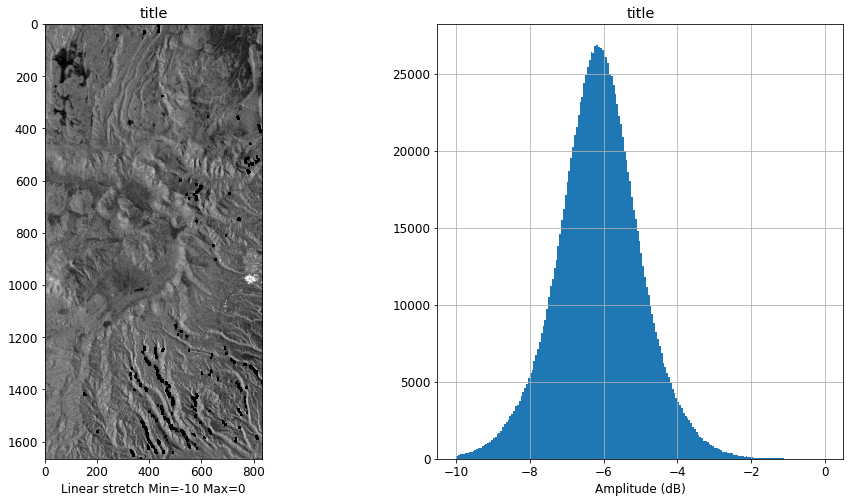

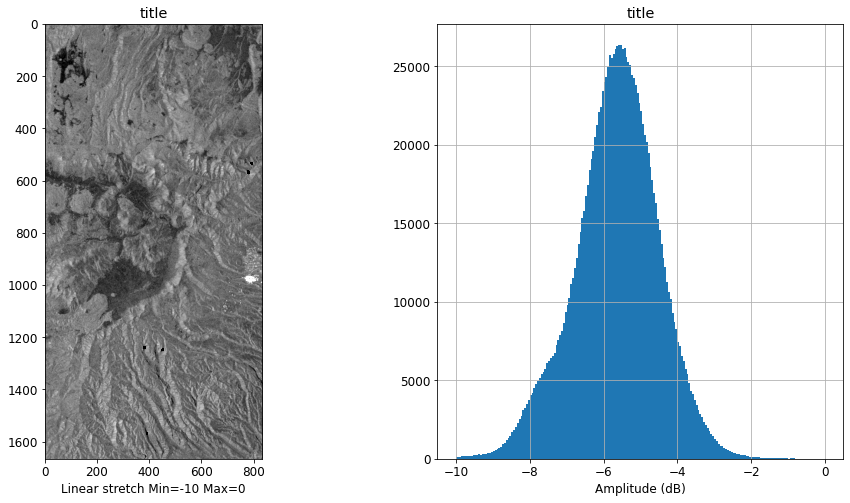

In [28]:
show_image_histogram(raster_15, 15, vmin=-10, vmax=0)
show_image_histogram(raster_1, 1, vmin=-10, vmax=0)

<br>
<hr>
<div class="alert alert-danger">
<font face="Calibri" size="5"> <b> <font color='rgba(200,0,0,0.2)'> <u>ASSIGNMENT #1</u>:  </font> Read Two Different Bands and Display them Using <i>showImage()</i> </b> <font color='rgba(200,0,0,0.2)'> -- [4 Points] </font> </font>

<font face="Calibri" size="3"> <b>This assignment includes four steps:</b> (1) Use the acquisition date information to select two new bands to display; (1) use <i>bandnbr</i> as the variable name to identify your bands of interest in the data stack; (3) use the already open image handle <i>img</i> to obtain the raster data from a band; (4) visualize the band using ```showImage()```. </font>
</div>
<hr>

<hr>

In [20]:
# ENTER YOUR CODE FOR LOADING AND DISPLAYING YOUR SECOND IMAGE HERE:

def showImage(raster, tindex, band_nbr, vmin=None, vmax=None, output_filename=None):
    assert 'plb' in globals(), 'Error: matplotlib.pylab must be imported as "plb"'
    assert 'plt' in globals(), 'Error: matplotlib.pyplot must be imported as "plt"'  
    
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(121)
    
    # plot image
    ax1.imshow(raster, cmap='gray', vmin=vmin, vmax=vmax)
    ax1.set_title('Image Band {} {}'.format(band_nbr, tindex[band_nbr-1].date()))
    vmin = np.percentile(raster, 2) if vmin==None else vmin
    vmax = np.percentile(raster, 98) if vmax==None else vmax
    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin, vmax))
    
    if output_filename:
        plt.savefig(output_filename, dpi=300, transparent='true')

In [21]:
raster_10 = img.GetRasterBand(10).ReadAsArray()
raster_41 = img.GetRasterBand(41).ReadAsArray()

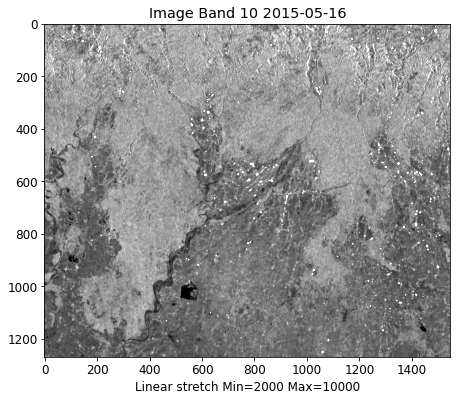

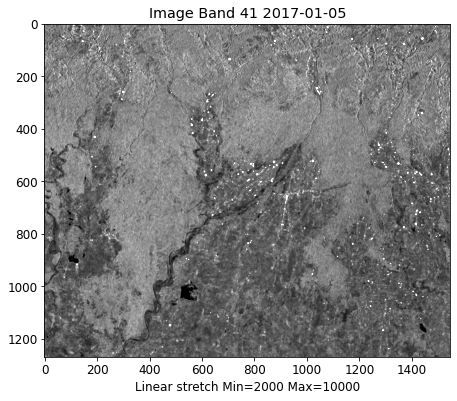

In [22]:
showImage(raster_10, tindex, 10, vmin=2000, vmax=10000)
showImage(raster_41, tindex, 41, vmin=2000, vmax=10000)

<hr>

<br>
<div class="alert alert-danger">
<font face="Calibri" size="5"> <b> <font color='rgba(200,0,0,0.2)'> <u>ASSIGNMENT #2</u>:  </font> Analyze Pairs of Image Bands by Displaying them Side-by-Side </b> <font color='rgba(200,0,0,0.2)'> -- [6 Points] </font> </font>

<font face="Calibri" size="3"> <u>For this exercise please complete the following activities</u>:
<ol type="1">
    <li><b>Write a function to display two different image bands side-by-side</b>. Make sure that the sub-figure titles disclose the acquisition dates of the images and that the images are scaled the same to the identical DN range (by specifying (vmin,vmax)). You can steal code elements from function <i>showImage()</i> for this exercise. <font color='rgba(200,0,0,0.2)'> -- [2 Points] </font></li>
    <br>
    <li><b>Create a figure that compares two images</b> from the <b>winter vs. the summer</b> season.<font color='rgba(200,0,0,0.2)'> -- [1 Point] </font></li>
    <br>
    <li><b>Describe the differences you see between these images</b> and make a suggestion what may have caused these differences.<font color='rgba(200,0,0,0.2)'> -- [1 Points] </font></li>   
    <br>
    <li><b>Create a figure that compares two images from different years</b> (e.g., 2014 vs 2017).<font color='rgba(200,0,0,0.2)'> -- [1 Point] </font></li>
    <br>
    <li><b>Describe the differences you see between these images</b> and make a suggestion what may have caused these differences.<font color='rgba(200,0,0,0.2)'> -- [1 Points] </font></li> 
</ol> 
</font>
</div>
<hr>

In [23]:
# Step 1: Write function for side-by-side image display
# ENTER YOUR CODE HERE
def show_two_images(raster, raster2, tindex, band_nbr, band_nbr2, vmin=None, vmax=None, output_filename=None):
    assert 'plb' in globals(), 'Error: matplotlib.pylab must be imported as "plb"'
    assert 'plt' in globals(), 'Error: matplotlib.pyplot must be imported as "plt"'  
    
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    # plot image
    ax1.imshow(raster, cmap='gray', vmin=vmin, vmax=vmax)
    ax1.set_title('Image Band {} {}'.format(band_nbr, tindex[band_nbr-1].date()))
    vmin = np.percentile(raster, 2) if vmin==None else vmin
    vmax = np.percentile(raster, 98) if vmax==None else vmax
    ax1.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin, vmax))
    
        # plot image
    ax2.imshow(raster2, cmap='gray', vmin=vmin, vmax=vmax)
    ax2.set_title('Image Band {} {}'.format(band_nbr2, tindex[band_nbr2-1].date()))
    vmin = np.percentile(raster2, 2) if vmin==None else vmin
    vmax = np.percentile(raster2, 98) if vmax==None else vmax
    ax2.xaxis.set_label_text('Linear stretch Min={} Max={}'.format(vmin, vmax))

    
    if output_filename:
        plt.savefig(output_filename, dpi=300, transparent='true')

In [24]:
raster_20 = img.GetRasterBand(20).ReadAsArray()

<hr>

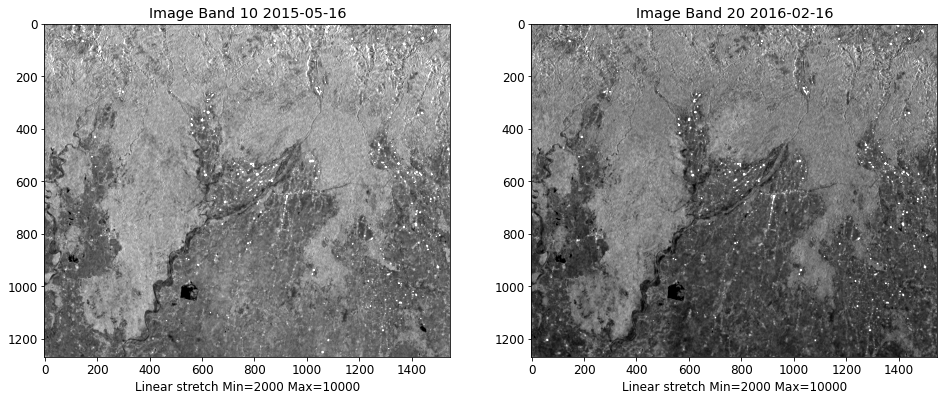

In [25]:
# Step 2: Pick images from winter and summer and display them side-by-side
# ENTER YOUR CODE HERE

show_two_images(raster_10, raster_20, tindex, 10, 20, vmin=2000, vmax=10000)

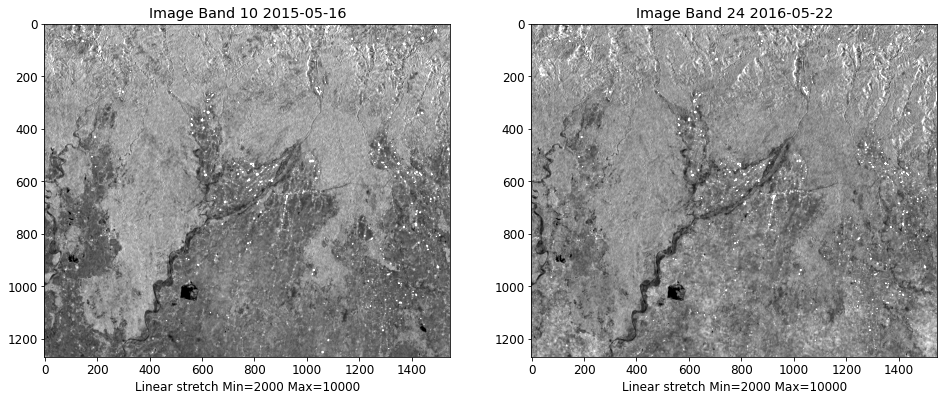

In [26]:
# Step 4: Pick images from different years and display them side-by-side
# ENTER YOUR CODE HERE
raster_24 = img.GetRasterBand(24).ReadAsArray()
show_two_images(raster_10, raster_24, tindex, 10, 24, vmin=2000, vmax=10000)

<hr>
<div class="alert alert-danger">
    <font face="Calibri" size="3"> <i><font color='rgba(200,0,0,0.2)'> <b>Step 5</b>: </font>Describe the differences you see between these image and suggest what may have caused these differences.

# Winter vs. Summer
        
        The left image shows May 16, 2015, and the right image shows May 22, 2016. While these images are taken almost exactly a year apart, the radar cross-sections displayed are quite different. This is because the images are taken on a single day and the radar brightness can be influenced by precipitation events that increase soil moisture. I would expect it to just have rained in the right side image, explaining why it is overall brighter than the left image.
        
# May 2015 vs. May 2016
        
        The left image shows May 16th, 2015, and the right image shows February 2nd, 2016. The main difference between these two images is the brightness of the lower part of the image which isn't forested. The bright area that stays relatively constant between both images is the forested area. We know this by looking at the optical Google Earth imagery from this area. The area that has a sharp contrast between the two images is nonforested and most likely cropland. It makes sense the radar brightness would go down in the winter because this isn't growing season, therefore they're not irrigating the land, and you would expect less soil moisture in that area during the winter.
        
</font>
</div>

<hr>

# 5. SAR Time Series Visualization, Animation, and Analysis

<font face="Calibri" size="3"> This section introduces you to the handling and analysis of SAR time series stacks. A focus will be put on time series visualization, which allow us to inspect time series in more depth. Note that html animations are not exported into the pdf file, but will display interactively. </font>

## 5.1 Reading the SAR Time Series Subset

<font face="Calibri" size="3"> Let's read an image subset (offset 400, 400 /  size 600, 600) of the entire time series data stack. The data are linearly scaled amplitudes represented as unsigned 16 bit integer. This was done to save storage space and required rescaling of all images using a "calibration constant". While it reduced storage volume, this rescaling means that we "re-calibrate" the images later.

We use the GDAL ```ReadAsArray(xoff,yoff,xsize,ysize)``` function where *xoff* is the offset in pixels from upper left; *yoff* is the offset in lines from upper left; *xsize* is the number of pixels and *ysize* is the number of lines of the subset.

If ```ReadAsArray()``` is called without any parameters, the entire image data stack is read. 

Let's first <b>define a subset and make sure it is in the right geographic location</b>. </font> 

In [ ]:
# Open the image and read the first raster band
band = img.GetRasterBand(1)

# Define the subset
subset = (400, 400, 600, 600) # offset for first two, pixel dimensions last two

<font face="Calibri" size="3"> Now we are ready to <b>extract this subset from all slices of the data stack</b>. </font>

In [ ]:
# Plot one band together with the outline of the selected subset to verify its geographic location.
plt.rcParams.update({'font.size': 14})
raster = band.ReadAsArray()
vmin = np.percentile(raster.flatten(), 5)
vmax = np.percentile(raster.flatten(), 95)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(raster, cmap='gray', vmin=vmin, vmax=vmax)
# plot the subset as rectangle
_ = ax.add_patch(patches.Rectangle((subset[0], subset[1]), subset[2], subset[3], fill=False, edgecolor='red'))
plt.savefig('AOI.png', dpi=300, transparent='false')

In [ ]:
raster0 = band.ReadAsArray(*subset)
bandnbr = 0 # Needed for updates
rasterstack = img.ReadAsArray(*subset)

<font face="Calibri" size="3"><b>Close img, as it is no longer needed in the notebook:</b></font> 

In [ ]:
img = None

## 5.2 Calibration and Data Conversion between dB and Power Scales

<font face="Calibri" size="3"> Focused SAR image data natively come in uncalibrated digital numbers (DN) and need to be calibrated to correspond to proper radar cross section information. 

Calibration coefficients for SAR data are often defined in the decibel (dB) scale due to the high dynamic range of the imaging system. For the L-band ALOS PALSAR data at hand, the conversion from uncalibrated DN values to calibrated radar cross section values in dB scale is performed by applying a standard **calibration factor of -83 dB**. 
<br> <br>
$\gamma^0_{dB} = 20 \cdot log10(DN) -83$

The data at hand are radiometrically terrain corrected images, which are often expressed as terrain flattened $\gamma^0$ backscattering coefficients. For forest and land cover monitoring applications $\gamma^o$ is the preferred metric.

Let's <b>apply the calibration constant for our data and export it in *dB* scale</b>: </font> 

In [ ]:
caldB = 20*np.log10(rasterstack) - 83

<font face="Calibri" size="3"> While **dB**-scaled images are often "visually pleasing", they are often not a good basis for mathematical operations on data. For instance, when we compute the mean of observations, it makes a difference whether we do that in power or dB scale. Since dB scale is a logarithmic scale, we cannot simply average data in that scale. 
    
Please note that the **correct scale** in which operations need to be performed **is the power scale.** This is critical, e.g. when speckle filters are applied, spatial operations like block averaging are performed, or time series are analyzed.

To **convert from dB to power**, apply: $\gamma^o_{pwr} = 10^{\frac{\gamma^o_{dB}}{10}}$ </font>

In [ ]:
calPwr = np.power(10., caldB/10.)

## 5.3 Create a Time Series Animation

<font face="Calibri" size="3">First, <b>Create a directory in which to store our plots and move into it:</b></font> 

In [ ]:
os.chdir(path)
product_path = 'plots_and_animations'
new_directory(product_path)
if path_exists(product_path) and os.getcwd() != f"{path}/{product_path}":
    os.chdir(product_path)
print(f"Current working directory: {os.getcwd()}")

<font face="Calibri" size="3"> Now we are ready to <b>create a time series animation</b> from the calibrated SAR data. </font> 

In [ ]:
%%capture 
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.axis('off')
vmin = np.percentile(caldB.flatten(), 5)
vmax = np.percentile(caldB.flatten(), 95)
r0dB = 20*np.log10(raster0) - 83
im = ax.imshow(r0dB,cmap='gray', vmin=vmin, vmax=vmax)
ax.set_title("{}".format(tindex[0].date()))

def animate(i):
    ax.set_title("{}".format(tindex[i].date()))
    im.set_data(caldB[i])

# Interval is given in milliseconds
ani = an.FuncAnimation(fig, animate, frames=rasterstack.shape[0], interval=400)

<font face="Calibri" size="3"><b>Configure matplotlib's RC settings for the animation:</b></font> 

In [ ]:
rc('animation', embed_limit=40971520.0)  # We need to increase the limit maybe to show the entire animation

<font face="Calibri" size="3"><b>Create a javascript animation of the time-series running inline in the notebook:</b></font> 

In [ ]:
HTML(ani.to_jshtml())

<font face="Calibri" size="3"><b>Save the animation (animation.gif):</b></font> 

In [ ]:
ani.save('NepalTimeSeriesAnimation.gif', writer='pillow', fps=2)

## 5.4 Plot the Time Series of Means Calculated Across the Subset

<font face="Calibri" size="3"> To create the time series of means, we will go through the following steps:
1. Compute means using the data in **power scale** ($\gamma^o_{pwr}$) .
3. Convert the resulting mean values into dB scale for visualization.
4. Plot time series of means. </font> 

<font face="Calibri" size="3"><b>Compute the means:</b></font> 

In [ ]:
rs_means_pwr = np.mean(calPwr,axis=(1, 2))

<font face="Calibri" size="3"><b>Convert the resulting mean value time-series to dB scale for visualization and check that we got the means over time:</b></font> 

In [ ]:
rs_means_dB = 10.*np.log10(rs_means_pwr)
rs_means_pwr.shape

<font face="Calibri" size="3"><b>Plot and save the time series of means (time_series_means.png):</b></font> 

In [ ]:
# 3. Now let's plot the time series of means
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(111)
ax1.plot(tindex, rs_means_pwr)
plt.rcParams.update({'font.size': 14})
ax1.set_xlabel('Date')
ax1.set_ylabel('$\overline{\gamma^o}$ [power]')
ax1.grid(axis='x')

ax2 = ax1.twinx()
plt.rcParams.update({'font.size': 14})
ax2.plot(tindex, rs_means_dB, color='red')
ax2.set_ylabel('$\overline{\gamma^o}$ [dB]')
fig.legend(['power', 'dB'], loc=1)
plt.title('Time series profile of average band backscatter $\gamma^o$ ')
plt.savefig('time_series_means', dpi=72, transparent='true')

## 5.5 Create Two-Panel Figure with Animated Global Mean $\mu_{\gamma^0_{dB}}$

<font face="Calibri" size="3"> We use a few Matplotlib functions to <b>create a side-by-side animation of the dB-scaled imagery and the respective global means $\mu_{\gamma^0_{dB}}$.</b> </font> 

In [ ]:
%%capture 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios':[1, 3]})
plt.rcParams.update({'font.size': 14})
vmin = np.percentile(rasterstack.flatten(), 5)
vmax = np.percentile(rasterstack.flatten(), 95)
im = ax1.imshow(raster0, cmap='gray', vmin=vmin, vmax=vmax)
ax1.set_title("{}".format(tindex[0].date()))
ax1.set_axis_off()

ax2.axis([tindex[0].date(), tindex[-1].date(), rs_means_dB.min(), rs_means_dB.max()])
plt.rcParams.update({'font.size': 14})
ax2.set_ylabel('$\overline{\gamma^o}$ [dB]')
ax2.set_xlabel('Date')
ax2.set_ylim((-10, -5))
ax2.grid()
l, = ax2.plot([], [])
plt.tight_layout()

def animate(i):
    ax1.set_title("{}".format(tindex[i].date()))
    im.set_data(rasterstack[i])
    ax2.set_title("{}".format(tindex[i].date()))
    l.set_data(tindex[:(i+1)], rs_means_dB[:(i+1)])

# Interval is given in milliseconds
ani = an.FuncAnimation(fig, animate, frames=rasterstack.shape[0], interval=400)

<font face="Calibri" size="3"><b>Configure matplotlib's RC settings for the animation:</b></font>

In [ ]:
HTML(ani.to_jshtml())

<font face="Calibri" size="3"><b>Save the animated time-series and histogram (animation_histogram.gif):</b></font>

In [ ]:
ani.save('NepalTSAnimation_means.gif', writer='pillow', fps=2)

<br>
<hr>
<div class="alert alert-danger">
<font face="Calibri" size="5"> <b> <font color='rgba(200,0,0,0.2)'> <u>ASSIGNMENT #3</u>:  </font> Discuss the Global Mean Time-Series Plot </b> <font color='rgba(200,0,0,0.2)'> -- [4 Points] </font> </font>

<font face="Calibri" size="3"> <u>For this exercise please answer the following questions</u>:
<ol type="1">
    <li>What kind of temporal patterns do you see in the time series for this subset. <font color='rgba(200,0,0,0.2)'> -- [2 Points] </font></li>
    <br>
    <li>What may explain the temporal patterns you observed? Relate your answer to Section 1 of this Notebook and to the information about what drives radar brighness from the class lectures.<font color='rgba(200,0,0,0.2)'> -- [2 Point] </font></li> 
</ol> 
</font>
</div>

<hr>
<div class="alert alert-danger">
<font face="Calibri" size="3"> <i><font color='rgba(200,0,0,0.2)'> <b>Step 1</b>: </font> What temporal patterns do you see in the global mean time series for your subset? </i> 

PROVIDE YOUR ANSWER HERE!
</font>
</div>
<hr>

<div class="alert alert-danger"><font face="Calibri" size="3"> <i><font color='rgba(200,0,0,0.2)'> <b>Step 2</b>: </font> What may explain the temporal patterns you observed? </i> 

PROVIDE YOUR ANSWER HERE!
</font>
</div>
<hr>

<br>
<div class="alert alert-danger">
<font face="Calibri" size="5"> <b> <font color='rgba(200,0,0,0.2)'> <u>ASSIGNMENT #4</u>:  </font> Select a Different (non-overlapping) Subset and Redo Analysis</b> <font color='rgba(200,0,0,0.2)'> -- [6 Points] </font> </font>

<font face="Calibri" size="3"> <u>For this exercise please complete the following tasks</u>:
<ol type="1">
    <li>Define a second subset stack. <font color='rgba(200,0,0,0.2)'> -- [1 Point] </font></li>
    <br>
    <li>Compute the means (use power data for this step)<font color='rgba(200,0,0,0.2)'> -- [1 Points] </font></li>
    <br>
    <li>Convert to dB for visualization<font color='rgba(200,0,0,0.2)'> -- [1 Points] </font></li>
    <br>
    <li>Create two panel figure with Animated Global Mean $\mu_{\gamma^0_{dB}}$<font color='rgba(200,0,0,0.2)'> -- [1 Point]
    </font></li>
    <br>
    <li>Discuss the time series plot. Discuss differences to the previous time series should there be any. <font color='rgba(200,0,0,0.2)'> -- [2 Point]
    </font></li>
</ol> 
</font>
</div>
<hr>

In [27]:
# Define the subset
subset2 = (10, 10, 400, 400) # offset for first two, pixel dimensions last two

In [ ]:
# Plot one band together with the outline of the selected subset to verify its geographic location.
plt.rcParams.update({'font.size': 14})
raster = band.ReadAsArray()
vmin = np.percentile(raster.flatten(), 5)
vmax = np.percentile(raster.flatten(), 95)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(raster, cmap='gray', vmin=vmin, vmax=vmax)
# plot the subset as rectangle
_ = ax.add_patch(patches.Rectangle((subset2[0], subset2[1]), subset2[2], subset2[3], fill=False, edgecolor='blue'))
plt.savefig('AOI.png', dpi=300, transparent='false')

<hr>

In [ ]:
# Steps 2 - 3: Compute means and convert to dB
# ENTER YOUR CODE HERE
raster0 = band.ReadAsArray(*subset2)
bandnbr = 0 # Needed for updates
rasterstack2 = img.ReadAsArray(*subset2)

In [ ]:
caldB2 = 20*np.log10(rasterstack2) - 83
calPwr2 = np.power(10., caldB2/10.)

In [ ]:
#compute mean of second subset
rs_means_pwr2 = np.mean(calPwr2,axis=(1, 2))
#compute to dB for visualization
rs_means_dB2 = 10.*np.log10(rs_means_pwr2)
rs_means_pwr2.shape

<hr>

In [ ]:
# Step 4: Create two panel figure with animated global means
# ENTER YOUR CODE HERE
# Step 4: Create two panel figure with animated global means
# ENTER YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios':[1, 3]})
plt.rcParams.update({'font.size': 14})
vmin = np.percentile(rasterstack2.flatten(), 5)
vmax = np.percentile(rasterstack2.flatten(), 95)
im = ax1.imshow(raster0, cmap='gray', vmin=vmin, vmax=vmax)
ax1.set_title("{}".format(tindex[0].date()))
ax1.set_axis_off()

ax2.axis([tindex[0].date(), tindex[-1].date(), rs_means_dB2.min(), rs_means_dB2.max()])
plt.rcParams.update({'font.size': 14})
ax2.set_ylabel('$\overline{\gamma^o}$ [dB]')
ax2.set_xlabel('Date')
ax2.set_ylim((-9, -4))
ax2.grid()
l, = ax2.plot([], [])
plt.tight_layout()

def animate(i):
    ax1.set_title("{}".format(tindex[i].date()))
    im.set_data(rasterstack2[i])
    ax2.set_title("{}".format(tindex[i].date()))
    l.set_data(tindex[:(i+1)], rs_means_dB2[:(i+1)])

# Interval is given in milliseconds
ani = an.FuncAnimation(fig, animate, frames=rasterstack2.shape[0], interval=400)

In [ ]:
HTML(ani.to_jshtml())

<hr>
<div class="alert alert-danger">
<font face="Calibri" size="3"> <i><font color='rgba(200,0,0,0.2)'> <b>Step 5</b>: </font> Discuss time series plot.

PROVIDE YOUR ANSWER HERE!
</font>
</div>
<hr>

# 6. Version Log

<font face="Calibri" size="2"> <i>GEOS 657 Microwave Remote Sensing - Version 1.3 - January 2021
    <br>
        <b>Version Changes:</b>
    <ul>
        <li>Revised assignments and formatting</li>
        <li>Capture matplotlib deprecation warnings in import cell</li>
        <li>Add --region=us-east-1 --no-sign-request to aws s3 cp call</li>
    </ul>
    </i>
</font>